### **Metric Evaluation**

metrik yang akan di gunakan untuk mengukur performa dari model adalah : 

**1. MAPE (mean absolute percentage error)**

MAPE didefinisikan sebagai rata-rata kesalahan absolut antara nilai aktual dan nilai prediksi, dinyatakan dalam persentase dari nilai aktual. 

$$MAPE = \frac{1}{n} \sum\limits_{i=1}^n |\frac{y_i - \hat{y}_i}{y_i}|$$

cara kerja MAPE : 
- menghitung error (selisih) dari nilai actual - prediksi. kemudian di absolutkan 
- menghitung persentasi dari error . error yang sudah absolut di bagi dengan nilai aktual untuk mendapatkan error dalam bentuk persentase
- Hitung rata-rata dari semua kesalahan persentase untuk mendapatkan MAPE.

Keunggulan MAPE : 
- karena dalam bentuk persentasi akan lebih mudah di interpretasi dan di jelaskan untuk orang yang non-teknis. 
- lebih mudah membandingkan untuk evaluasi metrik antar model 

Kekurangan MAPE : 
- jika nilai aktual mendekati nol maka mape bisa menjadi sangat besar karena pembagian dengan nol. 
- MAPE cenderung memberikan bobot yang lebih besar pada kesalahan yang terjadi pada nilai aktual yang kecil, karena kesalahan persentasenya menjadi besar
- sensitif terhadap outlier

**2. MAE (mean absolute error)**

MAE didefinisikan sebagai rata-rata dari semua nilai absolut selisih antara nilai aktual dan nilai prediksi. 

$$MAE = \frac{1}{n} \sum\limits_{i=1}^n |y_i - \hat{y}_i|$$

cara kerja MAE : 
- menghitung error (selisih) dari nilai aktual - nilai prediksi kemudian di absolutkan 
- menghitung rata rata dari semua error untuk mendapatkan MAE 

keunggulan MAE : 
- MAE mudah dihitung dan diinterpretasikan, karena menggambarkan kesalahan rata-rata dalam unit yang sama dengan data asli
- karena menghitung nilai absolut maka MAE lebih robust terhadap outlier di bandingkan metrik lain seperti MSE. 

kekurangan MAE : 
- MAE hanya memperhitungkan besarnya kesalahan tanpa memperhatikan apakah prediksi terlalu tinggi atau terlalu rendah.

**3. RMSE (root mean squared error)**

RMSE didefinisikan sebagai akar kuadrat dari rata-rata kuadrat perbedaan antara nilai aktual dan nilai prediksi

$$RMSE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2}$$

cara kerja RMSE : 
- menghitung selisih nilai aktual - prediksi. kemudian selisih akan di kuadratkan untuk mendapatkan error kuadrat 
- menghitung rata rata dari jumlah seluruh error kuadrat untuk mendapatkan MSE
- mengambil akar kuadrat dari MSE agar menjadi RMSE 

keunggulan RMSE : 
- Karena RMSE mengkuadratkan selisih antara nilai aktual dan nilai prediksi, kesalahan yang lebih besar memiliki pengaruh yang lebih signifikan terhadap nilai RMSE dibandingkan kesalahan yang lebih kecil. hal ini berarti jika terdapat nilai prediksi yang memiliki perbedaan sangat besar terhadap nilai aktual maka RMSE akan lebih tinggi.  
- RMSE diukur dalam unit yang sama dengan variabel yang diprediksi. Ini memudahkan interpretasi hasil karena kita dapat langsung memahami besaran kesalahan dalam konteks yang sama dengan data yang digunakan. jika memprediksi ribuan Dollar maka RMSE juga akan berada dalam ribuan dollar. 

kekurangan RMSE : 
- Sensitivitas terhadap kesalahan besar dapat menjadi kelemahan jika data memiliki outlier yang tidak representatif

Alasan Menggunakan MAPE, MAE, dan RMSE : 
- RMSE :  Karena diukur dalam unit yang sama dengan variabel yang diprediksi yaitu rp House Price Kota Bandung, RMSE memberikan gambaran yang mudah dipahami tentang skala kesalahan dalam bentuk Rupiah. RMSE memberikan penalti yang besar terhadap outlier di residual (error) sehingga cocok untuk mendapatkan gambaran model terbaik dalam memprediksi nilai *House Price*. 
- MAPE : dalam bisnis MAPE lebih mudah di pahami dan di interpretasikan oleh orang non teknis karena kesalahan yang di hitung di tampilkan dalam bentuk persen. dalam hal ini adalah kesalahan antara nilai aktual dan prediksi terhadap *House Price* dan di sajikan dalam persen. 
- MAE : MAE dihitung dengan mengambil rata-rata dari nilai absolut selisih antara nilai prediksi dan nilai aktual. MAE dapat dengan mudah diinterpretasikan sebagai kesalahan rata-rata yang dihasilkan oleh model. Unit MAE sama dengan unit Variabel Target *House Price* sehingga mudah dalam menjelaskannya. 

Metrik yang menjadi prioritas adalah : 
1. untuk komparasi model metrik yang di gunakan adalah RMSE. 
2. untuk penjelasan dalam bisnis metrik yang di gunakan adalah MAPE karena lebih mudah di interpretasikan. 

In [1]:
#-----numpy-------
import numpy as np

#-----pandas----- 
import pandas as pd 

#----visualisasi------
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')

#-----uji normalitas----
from scipy.stats import shapiro, normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor 


from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from category_encoders import BinaryEncoder, OrdinalEncoder, TargetEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score


#modeling 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=UserWarning)


In [2]:


df = pd.read_csv(r'Clean Data Housing Kota Bandung.csv')
display(
    df.head(),
    df.tail()
)

,Title,Address,District,KT,LB,LT,Price,index
0,cluster pramartha asri jatihandap residence ko...,antapani,antapani,2.0,45,50,4.300000e+08,1
1,rumah bagus dan asri geger kalong - komplek ...,gegerkalong,sukasari,3.0,250,179,2.600000e+09,1
2,rumah baru dkt padasuka cikutra surapati pusda...,cikutra,cibeunying kidul,2.0,33,50,3.500000e+08,1
3,cluster patragriya at podomoro park bandung,buahbatu,buahbatu,2.0,43,66,9.000000e+08,1
4,rumah dijual di bandung strategis harga nego,batununggal,bandung kidul,6.0,200,750,1.200000e+10,1


,Title,Address,District,KT,LB,LT,Price,index
1631,rumah di batununggal sentosa,batununggal,bandung kidul,5.0,350,300,6.250000e+09,1
1632,"rumah antik terawat di kawasan elit dago, saya...",dago,coblong,6.0,557,3,7.200000e+09,1
1633,"rumah hook strategis di turangga, buahbatu dek...",turangga,lengkong,6.0,230,219,3.900000e+09,1
1634,"rumah di tubagus ismail cocok untuk kantor, ko...",dago,coblong,9.0,400,601,1.000000e+10,1
1635,rumah semi furnished di puri dago antapani,antapani,antapani,5.0,250,192,2.300000e+09,1


In [3]:
df.describe()

,KT,LB,LT,Price,index
count,1636.000000,1636.000000,1.636000e+03,1.636000e+03,1636.0
mean,4.246333,212.435208,1.408335e+05,3.736161e+09,1.0
std,3.564669,309.182444,5.686378e+06,9.483876e+09,0.0
min,1.000000,1.000000,1.000000e+00,1.350000e+08,1.0
25%,3.000000,82.000000,9.600000e+01,9.498750e+08,1.0
50%,4.000000,150.000000,1.500000e+02,1.900000e+09,1.0
75%,5.000000,252.000000,2.800000e+02,3.600000e+09,1.0
max,100.000000,10060.000000,2.300000e+08,3.000000e+11,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1636 non-null   object 
 1   Address   1636 non-null   object 
 2   District  1636 non-null   object 
 3   KT        1636 non-null   float64
 4   LB        1636 non-null   int64  
 5   LT        1636 non-null   int64  
 6   Price     1636 non-null   float64
 7   index     1636 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 102.4+ KB


### **Data Prepocessing**

Pada pembahasan ini akan di lakukan data Prepocessing meliputi : 
- Handling Outliers
- Handling Cardinality 
- Handling Colinearity 


note : karena tidak ada missing value dan data duplikat sudah di hapus maka tidak missing value dan duplicated data tidak akan di bahas.

In [5]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in df.columns if df[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,KT,75,4.58,0.000000e+00,8.000000e+00
1,LB,106,6.48,-1.730000e+02,5.070000e+02
2,LT,117,7.15,-1.800000e+02,5.560000e+02
3,Price,158,9.66,-3.025312e+09,7.575188e+09
4,index,0,0.00,1.000000e+00,1.000000e+00


berdasarkan informasi di atas : 
1. upper bound dari Price adalah : 7.5 M 
2. upper bound dari Luas Tanah : 556 m
3. upper boun dari Luas Bangunan : 507 m 
4. upper bound dari Kamar Tidur : 8 kamar 


In [6]:
def plot_outlier_summary(outlier_df):
    fig, ax1 = plt.subplots(figsize=(10, 3))

    # Bar plot untuk total outliers
    sns.barplot(x='Total Outliers', y='Column', data=outlier_df, palette='viridis', ax=ax1)
    ax1.set_title('Total Outliers per Column')
    ax1.set_xlabel('Total Outliers')
    ax1.set_ylabel('Column')

    # Menambahkan anotasi untuk total outliers
    for i in ax1.containers:
        ax1.bar_label(i, fmt='%d', label_type='edge', fontsize=10)

    plt.show()

    fig, ax2 = plt.subplots(figsize=(10, 3))

    # Bar plot untuk persentase outliers
    sns.barplot(x='Percentage (%)', y='Column', data=outlier_df, palette='viridis', ax=ax2)
    ax2.set_title('Outlier Percentage per Column')
    ax2.set_xlabel('Percentage (%)')
    ax2.set_ylabel('Column')

    # Menambahkan anotasi untuk persentase outliers
    for i in ax2.containers:
        ax2.bar_label(i , fmt='%.2f', label_type='edge', fontsize=10)

    plt.show()



berdasarkan informasi di atas kita dapat mengetahui bahwa :
1. Kolom Price memiliki outlier tertinggi yaitu 9% 
2. seluruh kolom selain price memiliki outlier di atas 4% dan LT memiliki persentasi outlier tertinggi sebesar 7.15%

note : 

- kolom feature Price memiliki persentasi outlier yang cukup tinggi. jika outlier pada kolom target akan di handling maka akan terjadi limitasi model dalam memprediksi harga hanya pada rentang <= Rp 7.575.187.500

**Pertimbangan dan Pengambilan Keputusan**

Menghapus data outlier pada target  tentu saja bisa menjadi masalah karena kemungkinan menghilangkan informasi informasi penting data data target. Akan tetapi Outlier pada kolom target (Price) tetap akan di **HAPUS**. 

Hal ini di karenakan terjadi ketidakmampuan model dalam memprediksi target yang Outlier, sehingga berimbas kepada target yang bukan outlier (berada pada rentang di atas lower bound dan di bawah upper bound(berdasarkan IQR))

### **Handling Outlier On Data Target**



In [7]:
def remove_outliers_iqr(df, column):
    '''Fungsi Menghapus Outlier dan mengembalikan sebagai Dataframe'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df


df = remove_outliers_iqr(df, 'Price')

### **Check and Handling Colinearity**



In [8]:
num = [i for i in df.select_dtypes(include='number').columns]
VIF = [variance_inflation_factor(df[num],i) for i in range(len(df[num].columns))]

vif = pd.DataFrame()
vif['feature'] = df[num].columns
vif['VIF'] = [variance_inflation_factor(df[num],i) for i in range(len(df[num].columns))]
vif

,feature,VIF
0,KT,1.230955
1,LB,1.129084
2,LT,1.001000
3,Price,1.293823
4,index,4.115059


berdasarkan informasi di atas :
nilai VIF/Colinearity cukup rendah dan kolom index akan di hapus 

In [9]:
df = df.drop(columns='index')
df.head()

,Title,Address,District,KT,LB,LT,Price
0,cluster pramartha asri jatihandap residence ko...,antapani,antapani,2.0,45,50,4.300000e+08
1,rumah bagus dan asri geger kalong - komplek ...,gegerkalong,sukasari,3.0,250,179,2.600000e+09
2,rumah baru dkt padasuka cikutra surapati pusda...,cikutra,cibeunying kidul,2.0,33,50,3.500000e+08
3,cluster patragriya at podomoro park bandung,buahbatu,buahbatu,2.0,43,66,9.000000e+08
5,jual rumah di dago bandung mewah kodya smart v...,dago,coblong,3.0,142,120,2.800000e+09


### **Check and Handling Cardinality**


In [10]:
def check_cardinality(data):
    cardinality_info = []

    for feature in data.select_dtypes(include='object').columns:
        cardinality = len(data[feature].unique())
        warning = "High" if cardinality > 10 else "Low"
        cardinality_info.append({'Feature': feature, 'Cardinality': cardinality, 'Warning': warning})

    return pd.DataFrame(cardinality_info)

# Contoh penggunaan
cardinality_df = check_cardinality(df)
cardinality_df


,Feature,Cardinality,Warning
0,Title,1454,High
1,Address,75,High
2,District,29,High


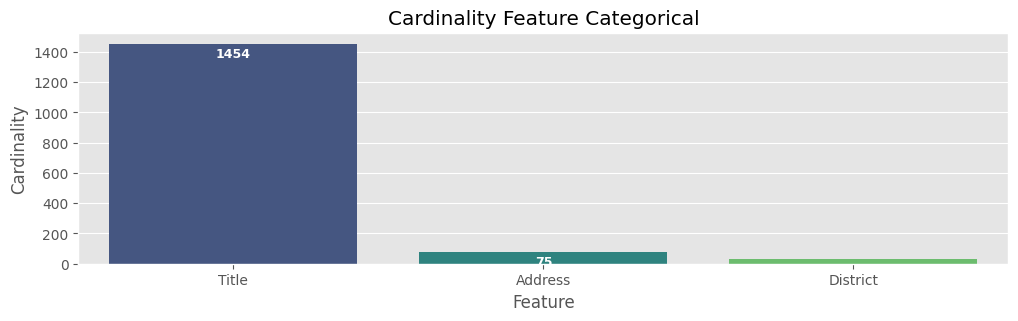

In [11]:
def annotate_bar_plot(ax):
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height():.0f}',  
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),  
                    ha='center', va='center',  
                    xytext=(0,-7),  
                    textcoords='offset points',  
                    fontsize=9,  
                    color='white',  
                    fontweight='semibold')
        
plt.figure(figsize=(12,3))
ax = sns.barplot(data=cardinality_df, x='Feature',y='Cardinality',hue='Feature',palette='viridis')
plt.title('Cardinality Feature Categorical')

annotate_bar_plot(ax)

karena cardinality seluruh kolom categorical sangat tinggi maka dari itu title dan address tidak akan di gunakan sebagai fitur machine learning, sementara untuk district tetap akan di gunakan dengan target encoding

In [12]:
df = df.drop(columns=['Title','Address'],axis=1)
df.head()

,District,KT,LB,LT,Price
0,antapani,2.0,45,50,4.300000e+08
1,sukasari,3.0,250,179,2.600000e+09
2,cibeunying kidul,2.0,33,50,3.500000e+08
3,buahbatu,2.0,43,66,9.000000e+08
5,coblong,3.0,142,120,2.800000e+09


#### **Maping District Berdasarkan Median Harga**

In [13]:
df['District'].unique()

array(['antapani', 'sukasari', 'cibeunying kidul', 'buahbatu', 'coblong',
       'mandalajati', 'arcamanik', 'bojongloa kaler', 'rancasari',
       'gedebage', 'cibeunying kaler', 'bandung kidul', 'kiaracondong',
       'ujungberung', 'sukajadi', 'regol', 'cidadap', 'lengkong',
       'cibiru', 'batununggal', 'cicendo', 'bandung kulon', 'andir',
       'panyileukan', 'astana anyar', 'bojongloa kidul', 'bandung wetan',
       'babakan ciparay', 'cinambo'], dtype=object)

In [14]:
map_bandung = df.groupby(['District'])[['Price']].median().reset_index().sort_values(by='Price',ascending=False)
map_bandung

,District,Price
18,coblong,3.500000e+09
16,cidadap,3.400000e+09
7,bandung wetan,3.000000e+09
10,bojongloa kidul,2.950000e+09
21,lengkong,2.900000e+09
25,regol,2.800000e+09
19,gedebage,2.655500e+09
26,sukajadi,2.600000e+09
5,bandung kidul,2.600000e+09
27,sukasari,2.600000e+09


In [15]:
district1 = map_bandung[map_bandung['Price']<1000000000]
district2 = map_bandung[(map_bandung['Price']<1800000000) & (map_bandung['Price']>=1000000000)]
district3 = map_bandung[(map_bandung['Price']<2500000000) & (map_bandung['Price']>=1800000000)]
district4 = map_bandung[(map_bandung['Price']<3000000000) & (map_bandung['Price']>=2500000000)]
district5 = map_bandung[map_bandung['Price']>=3000000000]

display(
    district1,district2,district3,district4,district5
)

,District,Price
20,kiaracondong,975000000.0
2,arcamanik,947500000.0
17,cinambo,885000000.0
3,astana anyar,825000000.0
22,mandalajati,802500000.0
23,panyileukan,785000000.0
28,ujungberung,600000000.0
14,cibiru,490000000.0


,District,Price
4,babakan ciparay,1.600000e+09
11,buahbatu,1.500000e+09
24,rancasari,1.300000e+09
1,antapani,1.200000e+09
9,bojongloa kaler,1.200000e+09
6,bandung kulon,1.200000e+09


,District,Price
12,cibeunying kaler,2.400000e+09
8,batununggal,2.300000e+09
0,andir,2.250000e+09
15,cicendo,2.125000e+09
13,cibeunying kidul,1.950000e+09


,District,Price
10,bojongloa kidul,2.950000e+09
21,lengkong,2.900000e+09
25,regol,2.800000e+09
19,gedebage,2.655500e+09
26,sukajadi,2.600000e+09
5,bandung kidul,2.600000e+09
27,sukasari,2.600000e+09


,District,Price
18,coblong,3.500000e+09
16,cidadap,3.400000e+09
7,bandung wetan,3.000000e+09


In [16]:
district5['District'].tolist()

['coblong', 'cidadap', 'bandung wetan']

In [17]:
#membuat fungsi maping district 

def categorize_price(price):
    if price < 1000000000:
        return 'District1'
    elif price >= 1000000000 and price <1800000000:
        return 'District2'
    elif price >= 1800000000 and price <2500000000:
        return 'District3'
    elif price >= 2500000000 and price <3000000000:
        return 'District4'
    else:
        return 'District5'
    
df['grade_district'] = df['Price'].apply(categorize_price)

df = df.drop(columns='District',axis=1)
df.head()

,KT,LB,LT,Price,grade_district
0,2.0,45,50,4.300000e+08,District1
1,3.0,250,179,2.600000e+09,District4
2,2.0,33,50,3.500000e+08,District1
3,2.0,43,66,9.000000e+08,District1
5,3.0,142,120,2.800000e+09,District4


## **Modelling**

### **Define Feature and Data Target**

pada tahapan ini akan di lakukan define feature dan targer beserta split data training dan test. 

- kolom yang akan menjadi target : **Price**
- Kolom yang akan menjadi feature : 
    - **feature numerikal** : `KT`, `LB`, `LT`
    - **feature kategorikal** : `District`

- Data train dan test akan di bagi dengan proporsi **80:20**

In [18]:
X = df.drop(columns='Price')
y = df['Price']


# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1034, 4), (444, 4))

### **Define Pipeline**


Untuk Feature Engginering akan di lakukan  `Handling Outlier`,`Encoding` dan `Scaling`. 

karena pada permodelan akan menggunakan Algoritma KNN dan SVR dimana kedua model ini membutuhkan scaling agar mendapatkan performance model yang baik maka Pipeline akan di buat seperti berikut



**data** &rightarrow; **Handling Outlier** &rightarrow; **tranformer(encoding)** &rightarrow; **scaling** &rightarrow; **modeling**

| Kolom | Encoding | Alasan |
|-------|----------|--------|
|District | Target Encoding | Memiliki Nilai Unik yang banyak |


Scalling akan menggunakan Robust Scaler karena terdapat outlier

In [19]:
#define outlier remove_outliers_iqr
from typing import Literal

class HandlingOutliers(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns
        return self 
    
    def transform(self, X, y=None):
        data = X.copy()
        
        # Kolom yang akan diproses
        columns_to_process = ['LB', 'LT', 'KT']
        
        for column in columns_to_process:
            # Menggunakan IQR untuk setiap kolom
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Menentukan batas bawah dan batas atas
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Mengganti outliers dengan batas yang sesuai
            data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
        
        return data
    
    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

In [20]:


# Define ColumnTransformer with OneHot, Ordinal, and Target Encoding



ct = ColumnTransformer([
    ('binary', OneHotEncoder(drop='first'), ['grade_district'])
], remainder='passthrough')

ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', OneHotEncoder(drop='first'),
                                 ['grade_district'])])

In [21]:
# define scaller
minmax = MinMaxScaler()
standard = StandardScaler()
scaler = RobustScaler()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# simulasi Pipeline untuk modeling 
Pipeline([
    ('outlier_remover', HandlingOutliers()),
    ('encoding',ct),
    ('scaler', scaler)
])

Pipeline(steps=[('outlier_remover', HandlingOutliers()),
                ('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary',
                                                  OneHotEncoder(drop='first'),
                                                  ['grade_district'])])),
                ('scaler', RobustScaler())])

**Flow Pipeline** : 
1. seluruh feature kategorikal akan di lakukan encodding. yakni Target Encoder. 
2. kemudian semua feature akan di lakukan scaling dengan menggunakan MinMaxScaler

note : 
- pada permodelan akan di gunakan model yang tidak membutuhkan scaling seperti Decison Tree, Gradient Boost dst. akan tetapi hal ini hanya di lakukan pada cross validation untuk mengkomparasi performance untuk setiap model. Jika salah satu dari 3 model terbaik tidak membutuhkan scaling maka pada proses hyperpameter tuning tidak akan di lakukan scaling agar mudah dalam  interpretasi model berbasis tree.

### **Define Model**

Penjelasan singkat terkait model yang di gunakan 

| Model | Deskripsi Singkat |
|-------|-------------------|
|Ridge | Ridge Regression adalah salah satu metode regresi yang digunakan dalam machine learning untuk menangani masalah overfitting dan multicollinearity secara sederhana Ridge akan menambahkan bias pada model untuk mengurangi varians dari model tersebut. |
| Lasso | Lasso adalah bentuk regresi penalized yang bertujuan untuk meningkatkan akurasi prediksi dan interpretabilitas model dengan memperkenalkan penalti untuk jumlah absolut dari koefisien regresi.|
|KNeighborsRegressor | metode non-parametrik yang, dengan cara intuitif, memperkirakan hubungan antara variabel independen dan hasil kontinu dengan merata-ratakan pengamatan dalam lingkungan yang sama. |
| DecissionTreeRegressor |  Algoritma ini bekerja dengan membangun sebuah model dalam bentuk pohon keputusan, yang memecah data input ke dalam subset-subset yang lebih kecil berdasarkan fitur-fitur tertentu hingga mencapai kondisi homogen yang cukup pada nilai target. |
| RandomForestRegressor | Algoritma ini merupakan pengembangan dari Decision Tree Regressor dan bekerja dengan menggabungkan prediksi dari banyak pohon keputusan (decision trees) yang berbeda untuk meningkatkan akurasi dan mengurangi overfitting. |
| AdaBoostRegressor |AdaBoost bekerja dengan membangun serangkaian model regresi sederhana secara iteratif. Setiap model dibangun untuk memperbaiki kesalahan dari model sebelumnya. Hasil akhir adalah kombinasi dari semua model ini, dengan penekanan lebih besar pada model-model yang performanya lebih baik |
| GradientBoostingRegressor | Algoritma ini merupakan metode boosting yang menggabungkan beberapa model regresi sederhana (biasanya decision trees) secara iteratif untuk membentuk model yang lebih kuat dan akurat. Gradient Boosting mengoptimalkan model dengan cara meminimalkan kesalahan prediksi secara bertahap menggunakan metode gradient descent |
| XGBRegressor | XGBRegressor membangun model regresi secara bertahap dengan menambahkan pohon keputusan baru yang memperbaiki kesalahan dari model sebelumnya. Proses ini menggunakan teknik gradient boosting untuk meminimalkan fungsi loss |
| SupportVectorRegression (SVR) |Support Vector Regression (SVR) adalah teknik regresi yang didasarkan pada Support Vector Machine (SVM) |
| CatBoostRegressor | CatBoost membangun model dengan menggabungkan prediksi dari beberapa pohon keputusan yang dihasilkan secara berurutan. Setiap pohon baru mencoba untuk memperbaiki kesalahan dari pohon sebelumnya.|
| LGBMRegressor | LightGBM menggunakan prinsip gradient boosting di mana model dibangun secara berurutan. Setiap model baru mencoba untuk memperbaiki kesalahan dari model sebelumnya dengan meminimalkan loss function tertentu, seperti mean squared error untuk regresi|

In [22]:
# define model 


pd.options.display.float_format = '{:,.2f}'.format

tree = DecisionTreeRegressor(random_state=0,max_depth=5)

ridge = Ridge()

lasso = Lasso()

rf = RandomForestRegressor(random_state=0)

ada = AdaBoostRegressor(random_state=0)

gb = GradientBoostingRegressor(random_state=0)

xgb = XGBRegressor(random_state=0,verbosity=0)

knn = KNeighborsRegressor()

svr = SVR()

cat = CatBoostRegressor(random_state=0,verbose=False)

lgbm = LGBMRegressor(random_state=0,verbose=-1)


In [23]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi kustom untuk menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Membuat scorer kustom
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [24]:
# Pilihan model
models = [ridge, lasso, tree, rf, ada, gb, xgb,knn,svr,cat,lgbm]
kf = KFold(n_splits=5)

# Mencari scoring berdasarkan mape 

mape_mean = []
mape_std = []


# scoring MAE
mae_mean = []
mae_std = []

# scoring RMSE 

rmse_mean = []
rmse_std = []


model_name = []

test_y_train = []

#finde the best models 

for model in models:

    model_pipeline = Pipeline([
        ('outlier_remove',HandlingOutliers()),
        ('prepocessing',ct),
        ('scaling',minmax),
        ('model',model)
    ])

    # model berdasrkan mape
    model_cv_mape = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv = kf,
        scoring=mape_scorer
    )

    mape_mean.append(model_cv_mape.mean())
    mape_std.append(model_cv_mape.std())
    # all_mape.append(model_cv.round(4))
    model_name.append(model.__class__.__name__)

    # model berdasarkan mae

    model_cv_mae = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv = kf,
        scoring='neg_mean_absolute_error'
    )

    mae_mean.append(model_cv_mae.mean())
    mae_std.append(model_cv_mae.std())


    # Model Berdasarkan RMSE 
    model_cv_rmse = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv = kf,
        scoring='neg_root_mean_squared_error'
    )

    rmse_mean.append(model_cv_rmse.mean())
    rmse_std.append(model_cv_rmse.std())
    test_y_train.append((y_train == 0).sum())




#Perdict ke Data Train
pd.DataFrame({
    'Model' : model_name,
    'mean_mape' : mape_mean,
    'std_mape' : mape_std,
    'mean_mae' : mae_mean,
    'std_mae' : mae_std, 
    'mean_rmse' : rmse_mean,
    'std_rmse' : rmse_std
}).sort_values(by='mean_rmse',ascending=False)



,Model,mean_mape,std_mape,mean_mae,std_mae,mean_rmse,std_rmse
7,KNeighborsRegressor,-17.91,1.29,"-303,762,658.06","26,681,936.60","-526,426,821.20","40,771,061.26"
3,RandomForestRegressor,-17.19,1.10,"-297,765,634.42","30,581,977.38","-540,371,315.56","36,954,178.80"
5,GradientBoostingRegressor,-20.49,0.71,"-321,223,349.76","27,659,394.97","-542,756,039.67","18,989,492.82"
10,LGBMRegressor,-18.13,0.76,"-313,625,362.09","31,930,383.51","-546,611,388.37","28,369,065.87"
0,Ridge,-22.55,0.83,"-361,177,113.74","15,611,926.87","-558,481,740.06","17,543,190.88"
1,Lasso,-22.25,0.74,"-361,117,183.55","15,690,008.78","-558,967,346.69","18,439,907.32"
9,CatBoostRegressor,-19.05,0.75,"-320,166,814.36","36,398,706.26","-563,204,999.94","37,157,531.88"
2,DecisionTreeRegressor,-21.75,1.66,"-327,769,392.09","25,113,364.37","-573,106,815.90","44,259,800.72"
4,AdaBoostRegressor,-30.11,2.30,"-414,601,981.93","21,592,567.29","-609,315,073.60","24,278,359.73"
6,XGBRegressor,-18.05,1.21,"-328,410,806.49","38,488,243.20","-616,487,198.68","45,973,595.27"


In [25]:
#predict ke data test dan train 
test_mape_score = []
test_mae_score = []
test_rmse_score = []


test_model_name = []


for model in models:

    #define pipeline
    model_pipeline = Pipeline([
        ('outlier_remove',HandlingOutliers()),
        ('prepocessing',ct),
        ('scaling',minmax),
        ('model',model)
    ])


    #fit ke data train 
    model_pipeline.fit(X_train, y_train)


    #predict ke test set
    y_pred_test = model_pipeline.predict(X_test)


    #evaluate score data test 
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))



    test_mape_score.append(mape)
    test_mae_score.append(mae)
    test_rmse_score.append(rmse)




    test_model_name.append(model.__class__.__name__)

pd.DataFrame({
    'model' : test_model_name,
    'MAPE_val' : mape_mean,
    'MAPE_test' : test_mape_score,
    'MAE_val' : mae_mean,
    'MAE_test' : test_mae_score,
    'RMSE_val' : rmse_mean,
    'RMSE_test' : test_rmse_score
}).sort_values(by=['RMSE_test','RMSE_val'],ascending=True)

,model,MAPE_val,MAPE_test,MAE_val,MAE_test,RMSE_val,RMSE_test
3,RandomForestRegressor,-17.19,15.20,"-297,765,634.42","346,095,529.07","-540,371,315.56","649,292,389.01"
10,LGBMRegressor,-18.13,16.93,"-313,625,362.09","366,838,098.90","-546,611,388.37","649,537,337.99"
5,GradientBoostingRegressor,-20.49,19.31,"-321,223,349.76","383,994,787.33","-542,756,039.67","650,894,916.15"
2,DecisionTreeRegressor,-21.75,20.35,"-327,769,392.09","381,906,821.98","-573,106,815.90","658,141,388.46"
4,AdaBoostRegressor,-30.11,27.02,"-414,601,981.93","458,809,994.12","-609,315,073.60","660,533,690.01"
9,CatBoostRegressor,-19.05,18.56,"-320,166,814.36","371,404,519.40","-563,204,999.94","666,694,214.85"
1,Lasso,-22.25,22.32,"-361,117,183.55","427,071,543.93","-558,967,346.69","667,416,879.63"
0,Ridge,-22.55,22.46,"-361,177,113.74","427,240,130.27","-558,481,740.06","667,743,299.47"
7,KNeighborsRegressor,-17.91,18.03,"-303,762,658.06","377,864,874.57","-526,426,821.20","693,010,471.91"
6,XGBRegressor,-18.05,16.87,"-328,410,806.49","374,351,958.05","-616,487,198.68","708,196,327.61"


informasi di atas menggambarkan hasil dari model benchmarking:

top 3 model berdsarkan `MAPE` dan `MAE` adalah :
- **Random Forest Regressor** :
    - mape | mae pada data train : **17 %** | `Rp 297,765,634`
    - mape | mae pada data test : **15 %** | `Rp 346,095,529`
- **Xgboost Regressor** :
    - mape | mae pada data train : **18 %** | `Rp 328,410,806`
    - mape | mae pada data test : **16 %** | `Rp 374,351,958`
- **LGBM Regressor** :
    - mape | mae pada data train : **18 %** | `Rp 313,625,362`
    - mape | mae pada data test : **17 %** | `Rp 366,838,098`

top 3 model berdasarkan `RMSE` adalah : 
- **Random Forest Regressor** : 
    - rmse pada data train : `Rp 540,371,315`
    - rmse pada data test : `Rp 649,292,389`
- **LGBM Regressor** :
    - rmse pada data train : `Rp 546,611,388`
    - rmse pada data test : `Rp 649,537,337`
- **Gradient Boosting Regressor** : 
    - rmse pada data train : `Rp 542,756,039`
    - rmse pada data test : `Rp 650,894,916`



### **Hyperparameter Tuning**

Tuning yang akan di lakukan berdasarkan evaluasi metrik `RMSE`, `MAPE` dan `MAE` adalah :
1. **Random Forest Regressor**
2. **LGBM Regressor** 
3. **Gradient Boosting Regressor**

#### **`Random Forest Regressor`**

parameter Random Forest Regressor yang akan di gunakan untuk Hyperparameter Tuning adalah : 

1. **n_estimators** : Jumlah Decision Tree dalam random forest
2. **max_features** : Jumlah fitur yang dipertimbangkan untuk membagi setiap node dalam setiap pohon
3. **max_depth** : Kedalaman maksimum dari setiap pohon keputusan dalam hutan.
4. **min_samples_split** : Jumlah minimum sampel yang diperlukan untuk memisahkan node internal.
5. **min_samples_leaf** : Jumlah minimum sampel yang diperlukan untuk berada di satu daun.

In [26]:
#model benchmarking 
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state=0)


# parameter tuning untuk random forest
param_grid_rf = {
    'model__n_estimators' : range(10,101,10),
    'model__max_features' : ['sqrt','log2',None],   #None = auto di sckitlearn versi baru
    'model__max_depth' : range(10,101,10),
    'model__min_samples_split': range(2, 21, 2),
    'model__min_samples_leaf': range(1, 21, 2)
}

# Pipeline Modeling (tanpa scaling karena berbasis tree)

model_rf = Pipeline([
    ('outlier_remove',HandlingOutliers()),
    ('prepocessing',ct),
    ('model',rf)
])

# cross val 
crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter Tuning 
# metrik refiit rmse 
tuned_rf_rmse = RandomizedSearchCV(
    estimator=model_rf, 
    param_distributions = param_grid_rf,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)


# metrik refiit mape

tuned_rf_mape = RandomizedSearchCV(
    estimator=model_rf, 
    param_distributions = param_grid_rf,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

# metrik refit mae 
tuned_rf_mae = RandomizedSearchCV(
    estimator=model_rf, 
    param_distributions = param_grid_rf,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

tuned_rf_rmse.fit(X_train,y_train)
tuned_rf_mape.fit(X_train,y_train)
tuned_rf_mae.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('outlier_remove',
                                              HandlingOutliers()),
                                             ('prepocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['grade_district'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distribut...model__max_depth': range(10, 101, 10),
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': range(1, 21, 2),
                                        'model__min_samples_split': range(2, 21, 2),
                                        'model__n_estimators': range(10, 101, 10)},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [27]:
pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Metric' : ['Refit RMSE','Refit MAPE','Refit MAE'],
    'Best Score' : [tuned_rf_rmse.best_score_,tuned_rf_mape.best_score_,tuned_rf_mae.best_score_],
    'Best Params' : [tuned_rf_rmse.best_params_,tuned_rf_mape.best_params_,tuned_rf_mae.best_params_]
})

,Metric,Best Score,Best Params
0,Refit RMSE,"-532,080,695.00","{'model__n_estimators': 40, 'model__min_samples_split': 6, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 60}"
1,Refit MAPE,-0.18,"{'model__n_estimators': 60, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 20}"
2,Refit MAE,"-304,363,883.58","{'model__n_estimators': 60, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 20}"


In [28]:
# Best Model Random Forest Using RMSE 

best_model_rf_rmse = tuned_rf_rmse.best_estimator_
best_model_rf_rmse.fit(X_train, y_train)  #fit ke data train


y_pred_rf = best_model_rf_rmse.predict(X_test)  #hasil predict 

# evaluate score 
mape_tuned_best_rf = mean_absolute_percentage_error(y_test,y_pred_rf)
mae_tuned_best_rf = mean_absolute_error(y_test,y_pred_rf)
rmse_tuned_best_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))

pd.DataFrame({
    'Model' : 'Random Forest Regressor',
    'MAPE Tuning Test' : [mape_tuned_best_rf],
    'MAE Tuning Test' : [mae_tuned_best_rf],
    'RMSE Tuning Test' : [rmse_tuned_best_rf]
})

,Model,MAPE Tuning Test,MAE Tuning Test,RMSE Tuning Test
0,Random Forest Regressor,17.53,"364,361,878.06","644,888,857.57"


In [29]:
# Best Model Random Forest Using MAPE 

best_model_rf_mape = tuned_rf_mape.best_estimator_
best_model_rf_mape.fit(X_train, y_train)  #fit ke data train


y_pred_rf = best_model_rf_mape.predict(X_test)  #hasil predict 

# evaluate score 
mape_tuned_best_rf = mean_absolute_percentage_error(y_test,y_pred_rf)
mae_tuned_best_rf = mean_absolute_error(y_test,y_pred_rf)
rmse_tuned_best_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))

pd.DataFrame({
    'Model Using Mape' : 'Random Forest Regressor',
    'MAPE Tuning Test' : [mape_tuned_best_rf],
    'MAE Tuning Test' : [mae_tuned_best_rf],
    'RMSE Tuning Test' : [rmse_tuned_best_rf]
})

,Model Using Mape,MAPE Tuning Test,MAE Tuning Test,RMSE Tuning Test
0,Random Forest Regressor,17.18,"362,517,634.67","668,309,900.70"


Komparasi Model Random Forest Regressor Sebelum dan Sesudah Tuning 

|Random Forest Regressor | MAPE Before Tuning | Mape After Tuning |RMSE Before Tuning|RMSE AFter Tuning| 
|------------------------|--------------------|-------------------|------------------|-----------------|
| Traning set            | 17%                | 18%               |540.371.315       |532.080.695      |
| Test set               | 15%                | 17%	              | 649.292.389      |644.888.857


pada model Random Forest Regressor terlihat bahwa :
- Tuning dengan Refiit menggunakan Mape tidak terlalu memberikan hasil yang maksimal dimana tidak terjadi peningkatan score.
- nilai RMSE setelah di tuning mengalami penurunan yang mengartikan bahwa tuning dengan refit rmse  telah berhasil meningkatkan akurasi.



**Best Parameter untuk Random Forest Regressor :** 

| n_estimators | max_features | max_depth | min_samples_split | min_samples_leaf |
|--------------|--------------|-----------|-------------------|-------------------|
| 40 | log2 | 60| 6 | 1 | 

#### **`LGBM Regressor`**

parameter yang akan di gunakan sebagai hyperparameter tuning adalah : 
1. 

In [30]:
# model benchmarking

lgbm = LGBMRegressor(random_state=0,verbose=-1)

# hyperparameter tuning 

param_grid_lgbm = {
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'model__n_estimators': [100, 300, 500, 700, 1000],
    'model__num_leaves': [20, 30, 40, 50, 100],
    'model__max_depth': [-1, 5, 10, 15],
    'model__min_data_in_leaf': [20, 50, 100],
    'model__feature_fraction': [0.6, 0.8, 1.0],
    'model__bagging_fraction': [0.6, 0.8, 1.0],
    'model__bagging_freq': [1, 3, 5],
    'model__lambda_l1': [0, 0.1, 1, 5],
    'model__lambda_l2': [0, 0.1, 1, 5]
}


# model pipeline 

model_lgbm = Pipeline([
    ('outlier_remove',HandlingOutliers()),
    ('prepocessing',ct),
    ('model',lgbm)
])

# metrik refiit rmse

tuned_lgbm_rmse = RandomizedSearchCV(
    estimator=model_lgbm, 
    param_distributions = param_grid_lgbm,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)


# metrik refiit mape

tuned_lgbm_mape = RandomizedSearchCV(
    estimator=model_lgbm, 
    param_distributions = param_grid_lgbm,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

# metrik refit mae 
tuned_lgbm_mae = RandomizedSearchCV(
    estimator=model_lgbm, 
    param_distributions = param_grid_lgbm,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

tuned_lgbm_rmse.fit(X_train,y_train)
tuned_lgbm_mape.fit(X_train,y_train)
tuned_lgbm_mae.fit(X_train,y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('outlier_remove',
                                              HandlingOutliers()),
                                             ('prepocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['grade_district'])])),
                                             ('model',
                                              LGBMRegressor(random_state=0,
                                                            verbose=-1))]),
                   n_iter=50, n_jobs=-1,
                   param_distri...
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2,
                                                                 0.3],
                                        'model__max_depth': [-1, 5, 10, 15],
                                        'model__min_data_in_leaf': [20, 50,
                                                                    100],
                                        'model__n_estimators': [100, 300, 500,
                                                                700, 1000],
                                        'model__num_leaves': [20, 30, 40, 50,
                                                              100]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [31]:
pd.DataFrame({
    'Metric' : ['Refit RMSE','Refit MAPE','Refit MAE'],
    'Best Score' : [tuned_lgbm_rmse.best_score_,tuned_lgbm_mape.best_score_,tuned_lgbm_mae.best_score_],
    'Best Params' : [tuned_lgbm_rmse.best_params_,tuned_lgbm_mape.best_params_,tuned_lgbm_mae.best_params_]
})

,Metric,Best Score,Best Params
0,Refit RMSE,"-530,876,376.73","{'model__num_leaves': 100, 'model__n_estimators': 300, 'model__min_data_in_leaf': 50, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__lambda_l2': 0.1, 'model__lambda_l1': 1, 'model__feature_fraction': 1.0, 'model__bagging_freq': 5, 'model__bagging_fraction': 0.8}"
1,Refit MAPE,-0.19,"{'model__num_leaves': 50, 'model__n_estimators': 500, 'model__min_data_in_leaf': 20, 'model__max_depth': 15, 'model__learning_rate': 0.05, 'model__lambda_l2': 1, 'model__lambda_l1': 0.1, 'model__feature_fraction': 1.0, 'model__bagging_freq': 1, 'model__bagging_fraction': 0.8}"
2,Refit MAE,"-315,835,442.09","{'model__num_leaves': 20, 'model__n_estimators': 700, 'model__min_data_in_leaf': 50, 'model__max_depth': -1, 'model__learning_rate': 0.05, 'model__lambda_l2': 5, 'model__lambda_l1': 1, 'model__feature_fraction': 0.8, 'model__bagging_freq': 1, 'model__bagging_fraction': 0.8}"


In [32]:
# Best Model LGBM Regressor Using RMSE 

best_model_lgbm_rmse = tuned_lgbm_rmse.best_estimator_
best_model_lgbm_rmse.fit(X_train, y_train)  #fit ke data train


y_pred_lgbm = best_model_lgbm_rmse.predict(X_test)  #hasil predict 

# evaluate score 
mape_tuned_best_lgbm = mean_absolute_percentage_error(y_test,y_pred_lgbm)
mae_tuned_best_lgbm = mean_absolute_error(y_test,y_pred_lgbm)
rmse_tuned_best_lgbm = np.sqrt(mean_squared_error(y_test,y_pred_lgbm))

pd.DataFrame({
    'Model' : 'LGBM Regressor',
    'MAPE Tuning Test' : [mape_tuned_best_lgbm],
    'MAE Tuning Test' : [mae_tuned_best_lgbm],
    'RMSE Tuning Test' : [rmse_tuned_best_lgbm]
})

,Model,MAPE Tuning Test,MAE Tuning Test,RMSE Tuning Test
0,LGBM Regressor,18.04,"380,471,406.18","640,545,737.78"


In [33]:
print(tuned_lgbm_rmse.best_estimator_)

Pipeline(steps=[('outlier_remove', HandlingOutliers()),
                ('prepocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary',
                                                  OneHotEncoder(drop='first'),
                                                  ['grade_district'])])),
                ('model',
                 LGBMRegressor(bagging_fraction=0.8, bagging_freq=5,
                               feature_fraction=1.0, lambda_l1=1, lambda_l2=0.1,
                               learning_rate=0.05, max_depth=5,
                               min_data_in_leaf=50, n_estimators=300,
                               num_leaves=100, random_state=0, verbose=-1))])


In [34]:
# Best Model LGBM Regressor Using MAPE 

best_model_lgbm_mape = tuned_lgbm_mape.best_estimator_
best_model_lgbm_mape.fit(X_train, y_train)  #fit ke data train


y_pred_lgbm = best_model_lgbm_mape.predict(X_test)  #hasil predict 

# evaluate score 
mape_tuned_best_lgbm = mean_absolute_percentage_error(y_test,y_pred_lgbm)
mae_tuned_best_lgbm = mean_absolute_error(y_test,y_pred_lgbm)
rmse_tuned_best_lgbm = np.sqrt(mean_squared_error(y_test,y_pred_lgbm))

pd.DataFrame({
    'Model Using Mape' : 'LGBM Regressor',
    'MAPE Tuning Test' : [mape_tuned_best_lgbm],
    'MAE Tuning Test' : [mae_tuned_best_lgbm],
    'RMSE Tuning Test' : [rmse_tuned_best_lgbm]
})

,Model Using Mape,MAPE Tuning Test,MAE Tuning Test,RMSE Tuning Test
0,LGBM Regressor,16.94,"369,337,888.54","659,768,951.92"


Komparasi Model LGBM Regressor Sebelum dan Sesudah Tuning 

|LightGBM Regressor      | MAPE Before Tuning | Mape After Tuning |RMSE Before Tuning|RMSE AFter Tuning| 
|------------------------|--------------------|-------------------|------------------|-----------------|
| Traning set            | 18%                | 19%               | 546,611,388      |530,876,376      |
| Test set               | 17%                | 17%	              | 649,537,337      |640,545,737


pada model LGBM Regressor terlihat bahwa :
- Tuning dengan Refiit menggunakan Mape tidak terlalu memberikan hasil yang maksimal dimana tidak terjadi peningkatan score.
- nilai RMSE setelah di tuning mengalami penurunan yang mengartikan bahwa tuning dengan refit rmse  telah berhasil meningkatkan akurasi.

#### **`Gradient Boosting Regressor`**

In [35]:
# model benchmarking 

gb = GradientBoostingRegressor(random_state=42)

# hyperparameter tuning 

param_grid_gb = {
    'model__n_estimators' : range(10,101,10),
    'model__learning_rate' : [0.001,0.01, 0.1],
    'model__max_depth' : range(3,21,3),
    'model__min_samples_split': range(2, 21, 2),
    'model__min_samples_leaf': range(1, 11, 2)
}

# model pipeline 

model_gb = Pipeline([
    ('outlier_remove',HandlingOutliers()),
    ('prepocessing',ct),
    ('model',gb)
])

# metrik refiit rmse

tuned_gb_rmse = RandomizedSearchCV(
    estimator=model_gb, 
    param_distributions = param_grid_gb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)


# metrik refiit mape

tuned_gb_mape = RandomizedSearchCV(
    estimator=model_gb, 
    param_distributions = param_grid_gb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

# metrik refit mae 
tuned_gb_mae = RandomizedSearchCV(
    estimator=model_gb, 
    param_distributions = param_grid_gb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

tuned_gb_rmse.fit(X_train,y_train)
tuned_gb_mape.fit(X_train,y_train)
tuned_gb_mae.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('outlier_remove',
                                              HandlingOutliers()),
                                             ('prepocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['grade_district'])])),
                                             ('model',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_dist...ons={'model__learning_rate': [0.001, 0.01,
                                                                 0.1],
                                        'model__max_depth': range(3, 21, 3),
                                        'model__min_samples_leaf': range(1, 11, 2),
                                        'model__min_samples_split': range(2, 21, 2),
                                        'model__n_estimators': range(10, 101, 10)},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [36]:
pd.DataFrame({
    'Metric' : ['Refit RMSE','Refit MAPE','Refit MAE'],
    'Best Score' : [tuned_gb_rmse.best_score_,tuned_gb_mape.best_score_,tuned_gb_mae.best_score_],
    'Best Params' : [tuned_gb_rmse.best_params_,tuned_gb_mape.best_params_,tuned_gb_mae.best_params_]
})

,Metric,Best Score,Best Params
0,Refit RMSE,"-544,173,380.04","{'model__n_estimators': 70, 'model__min_samples_split': 20, 'model__min_samples_leaf': 7, 'model__max_depth': 3, 'model__learning_rate': 0.1}"
1,Refit MAPE,-0.18,"{'model__n_estimators': 70, 'model__min_samples_split': 14, 'model__min_samples_leaf': 3, 'model__max_depth': 18, 'model__learning_rate': 0.1}"
2,Refit MAE,"-314,429,605.17","{'model__n_estimators': 40, 'model__min_samples_split': 8, 'model__min_samples_leaf': 9, 'model__max_depth': 15, 'model__learning_rate': 0.1}"


In [37]:
# Best Model LGBM Regressor Using RMSE 

best_model_gb_rmse = tuned_gb_rmse.best_estimator_
best_model_gb_rmse.fit(X_train, y_train)  #fit ke data train


y_pred_gb = best_model_gb_rmse.predict(X_test)  #hasil predict 

# evaluate score 
mape_tuned_best_gb = mean_absolute_percentage_error(y_test,y_pred_gb)
mae_tuned_best_gb = mean_absolute_error(y_test,y_pred_gb)
rmse_tuned_best_gb = np.sqrt(mean_squared_error(y_test,y_pred_gb))

pd.DataFrame({
    'Model' : 'Gradient Boosting Regressor',
    'MAPE Tuning Test' : [mape_tuned_best_gb],
    'MAE Tuning Test' : [mae_tuned_best_gb],
    'RMSE Tuning Test' : [rmse_tuned_best_gb]
})

,Model,MAPE Tuning Test,MAE Tuning Test,RMSE Tuning Test
0,Gradient Boosting Regressor,19.45,"389,689,111.33","656,156,979.91"


In [38]:
# Best Model Gradient Boosting Regressor Using MAPE 

best_model_gb_mape = tuned_gb_mape.best_estimator_
best_model_gb_mape.fit(X_train, y_train)  #fit ke data train


y_pred_gb = best_model_gb_mape.predict(X_test)  #hasil predict 

# evaluate score 
mape_tuned_best_gb = mean_absolute_percentage_error(y_test,y_pred_gb)
mae_tuned_best_gb = mean_absolute_error(y_test,y_pred_gb)
rmse_tuned_best_gb = np.sqrt(mean_squared_error(y_test,y_pred_gb))

pd.DataFrame({
    'Model Using Mape' : 'Gradient Regressor',
    'MAPE Tuning Test' : [mape_tuned_best_gb],
    'MAE Tuning Test' : [mae_tuned_best_gb],
    'RMSE Tuning Test' : [rmse_tuned_best_gb]
})

,Model Using Mape,MAPE Tuning Test,MAE Tuning Test,RMSE Tuning Test
0,Gradient Regressor,15.97,"368,782,067.19","692,802,288.36"


#### **Final Model**

setelah melakukan tuning ke 3 model terbaik (Random Forest regressor, LGBM Regressor, Gradient Boosting Regressor) maka akan di ambil satu model sebagai final model. ketiga model tersebut akan di komparasikan berdasarkan RMSE. karena cara kerja RMSE yang memberikan penalti lebih besar terhadap outlier residual maka akan sagat membantu dalam menangani kesalahan prediksi yang besar. RMSE terkecil lah yang akan di gunakan sebagai final model. 

Metrik MAPE dari model dengan RMSE terkecil akan  di gunakan untuk penjelasan dalam bisnis agar lebih mudah di interpretasikan. berikut hasil RMSE dan MAPE setelah di Tuning. 



<div style="display: flex; justify-content: center;">

| Model                       | RMSE Train   | RMSE Test   | MAPE Train | MAPE Test |
|-----------------------------|--------------|-------------|------------|-----------|
| **Random Forest Regressor**     | 532.080.695  | 644.888.857 | 18 %       | 17 %      |
| **Light GBM Regressor**        | 530,876,376  | 640,545,737 | 19 %       | 17 %      |
| **Gradient Boosting Regressor** | 544,173,380  | 656,156,979 | 18 %       | 16 %      |

</div>



berdasarkan informasi di atas akan di ambil keputusan bahwa model **Light GBM Regressor** sebagai final model untuk memprediksi House Price Prediction. hal ini di karenakan model **Light GBM Regressor** setelah di tuning memiliki RMSE paling kecil di bandingkan 2 model lainnya, walaupun perbedaan nya sangat tipis dengan Random Forest Regressor. **Parameter terbaik untuk Light GBM Regressor** : 

<div style="display: flex; justify-content: center;">

| num_leaves | n_estimators | min_data_in_leaf | max_depth | learning_rate | 
|------------|--------------|------------------|-----------|---------------|
| 100        | 300          | 50               | 5         | 0.05          | 

| lambda_l2 | lambda_l1 | feature_fraction | bagging_freq | bagging_fraction |
|-----------|-----------|------------------|--------------|------------------|
0.1       | 1         | 1.0              | 5            | 0.8             |

</div>


<p align='center'><b><span style="font-size:22px">LIGHT GRADIENT BOOSTING MACHINE REGRESSOR</span></b></p>

LightGBM Regressor adalah algoritma machine learning berbasis gradient boosting yang dirancang untuk menangani tugas-tugas regresi. Dikembangkan oleh Microsoft, algoritma ini merupakan bagian dari keluarga LightGBM (Light Gradient Boosting Machine) yang terkenal karena kecepatan dan efisiensinya, khususnya pada dataset besar. Gradient boosting adalah teknik yang menggabungkan beberapa model pohon keputusan sederhana (biasanya pohon yang dangkal) secara bertahap untuk membentuk model yang kuat. berikut saya sertakan gambar simulasi bagaimana **LightGBM Regressor** bekerja.

<p align="center">
<img src="https://www.mdpi.com/jmse/jmse-09-00496/article_deploy/html/images/jmse-09-00496-g001.png" width="700" height="500">
</p>

LightGBM bekerja dengan prinsip gradient boosting, yaitu secara iteratif membangun pohon keputusan baru untuk memperbaiki kesalahan model sebelumnya. Namun, LightGBM menggunakan teknik pertumbuhan pohon leaf-wise daripada level-wise, yang umum dalam algoritma boosting lainnya.

Berikut ringkasan dari cara kerja LightGBM Regressor:

- Inisialisasi Model: Model dimulai dengan inisialisasi yang membuat prediksi awal (biasanya rata-rata target pada tahap awal).

- Pembentukan Pohon secara Iteratif: Pada setiap iterasi, LightGBM membangun pohon baru yang ditujukan untuk meminimalkan loss dari prediksi yang ada. LightGBM memilih daun (leaf) dengan loss tertinggi pada setiap langkah (leaf-wise growth), yang memungkinkan model untuk belajar lebih cepat dan efektif.

- Optimasi dan Penurunan Loss: Setiap pohon baru menambah informasi untuk memperbaiki prediksi. Pada dasarnya, setiap pohon memprediksi residual (sisa kesalahan) dari model sebelumnya. Model kemudian menggabungkan hasil dari semua pohon untuk membuat prediksi akhir yang lebih akurat.

- Pengaturan Hyperparameter: LightGBM menyediakan parameter seperti learning_rate, num_leaves, max_depth, dan feature_fraction untuk mengontrol kompleksitas dan kecepatan konvergensi. Tuning parameter ini membantu mencegah overfitting dan memastikan performa optimal.

Dengan strategi ini, LightGBM Regressor dapat belajar dengan lebih cepat dan efisien dibandingkan algoritma boosting lainnya, sambil menghasilkan model yang akurat untuk tugas regresi.

In [39]:
# final model lgbm regressor 

final_model_lgbm = Pipeline([
    ('HandlingOutliers',HandlingOutliers()),
    ('prepocessing',ct),
    ('model', LGBMRegressor(
    num_leaves=100,
    n_estimators=300,
    min_data_in_leaf=50,
    max_depth=5,
    learning_rate=0.05,
    lambda_l2=0.1,
    lambda_l1=1,
    feature_fraction=1.0,
    bagging_freq=5,
    bagging_fraction=0.8,verbose=-1,random_state=0))
])

final_model_lgbm.fit(X_train, y_train)
y_pred_best_lgbm = final_model_lgbm.predict(X_test)

final_rmse_lgbm = np.sqrt(mean_squared_error(y_test,y_pred_best_lgbm))
final_mape_lgbm = mean_absolute_percentage_error(y_test, y_pred_best_lgbm)

print(f'Nilai RMSE terbaik untuk LGBM Regressor : {final_rmse_lgbm}')
print(f'Nilai MAPE terbaik untuk LGBM Regressor : {final_mape_lgbm}')

Nilai RMSE terbaik untuk LGBM Regressor : 640545737.7832252
Nilai MAPE terbaik untuk LGBM Regressor : 18.041427571627906


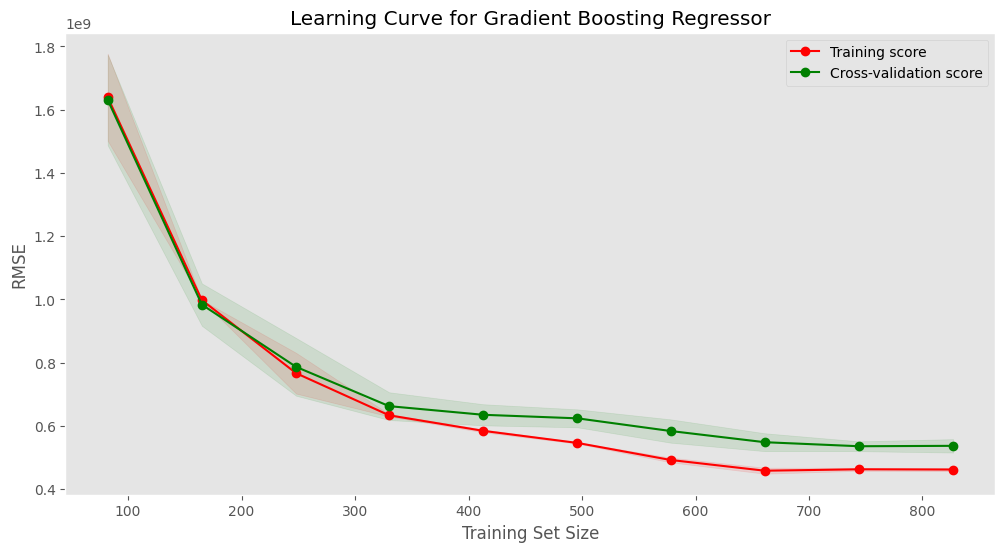

In [40]:
from sklearn.model_selection import learning_curve
plt.style.use('ggplot')

rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Dapatkan nilai training dan test score pada berbagai ukuran data pelatihan
train_sizes, train_scores, test_scores = learning_curve(
    final_model_lgbm,         # model pipeline
    X_train,                 # data fitur
    y_train,                 # target
    cv=5,                    # jumlah k-fold cross-validation
    scoring=rmse_scorer,     # metrik evaluasi
    train_sizes=np.linspace(0.1, 1.0, 10)  # ukuran data pelatihan dari 10% hingga 100%
)

# Hitung rata-rata dan standar deviasi untuk setiap ukuran pelatihan
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Tambahkan area standar deviasi
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Tambahkan label dan judul
plt.title("Learning Curve for Gradient Boosting Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.grid()
plt.show()

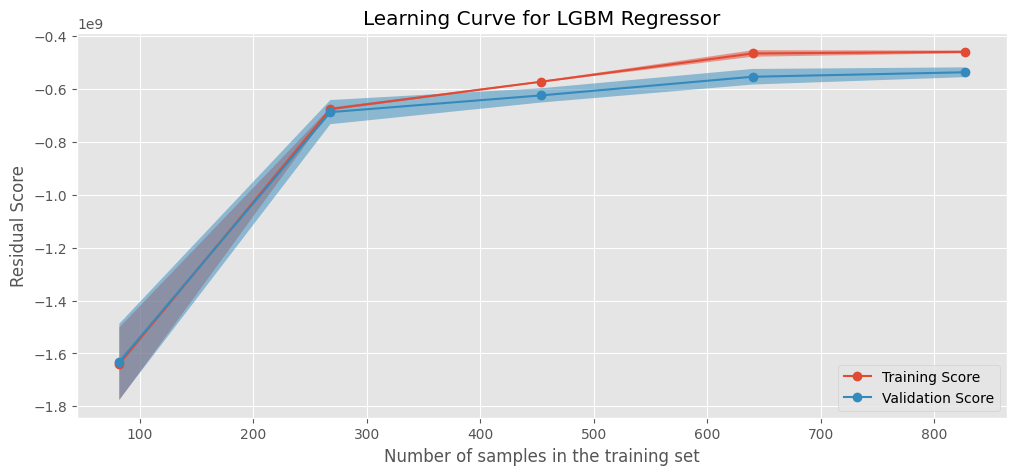

In [41]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import LearningCurveDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# mengambil data yang sudah di preprocessing
X_train_encoded = final_model_lgbm.named_steps['prepocessing'].transform(X_train)
column_names = final_model_lgbm.named_steps['prepocessing'].get_feature_names_out()
X_train_df = pd.DataFrame(X_train_encoded, columns=column_names)

# Mengambil model LGBM yang sudah dilatih dari pipeline untuk SHAP
lgbm_model = final_model_lgbm.named_steps['model']

# Membuat plot learning curve
fig, ax = plt.subplots(figsize=(12, 5))

# Menentukan parameter untuk LearningCurveDisplay
common_params = {
    "X": X_train_df,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "scoring": "neg_root_mean_squared_error",  # Menggunakan RMSE bawaan Scikit-Learn
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
}

# Membuat learning curve display
LearningCurveDisplay.from_estimator(lgbm_model, **common_params, ax=ax)

# Mengatur judul dan legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='lower right')
ax.set_title('Learning Curve for LGBM Regressor')
ax.set_ylabel('Residual Score')

# Menampilkan plot
plt.show()


berdasarkan informasi di atas : 

**1. Performa Model pada Training Set**

Training Score dimulai dengan skor residual yang rendah ketika jumlah sampel sekitar 100. Ini menunjukkan bahwa model LGBM Regressor memiliki error yang cukup besar pada data dengan sedikit sampel.
Ketika jumlah sampel bertambah, skor residual pada training set menjadi lebih tinggi (lebih mendekati nol). Ini menunjukkan bahwa error pada training set berkurang secara bertahap, menandakan model semakin memahami pola dalam data.

**2. Performa Model pada Validation Set**

Validation Score juga menunjukkan pola peningkatan yang serupa, tetapi dengan error yang lebih tinggi daripada Training Score pada sebagian besar titik.
Ketika jumlah sampel pelatihan meningkat hingga sekitar 500 sampel, Validation Score terlihat semakin stabil dan mendekati skor pada training set. Hal ini mengindikasikan bahwa model semakin baik dalam generalisasi pada data yang belum pernah dilihat, tetapi tetap menunjukkan adanya error yang konsisten.

**3. Gap Antara Training Score dan Validation Score**

Pada awalnya, terdapat perbedaan besar antara Training Score dan Validation Score, yang menandakan bahwa model overfitting ketika jumlah data pelatihan masih sedikit.
Seiring bertambahnya jumlah sampel pelatihan, perbedaan antara kedua skor ini mulai berkurang, yang menunjukkan bahwa model menjadi lebih baik dalam menggeneralisasi. Meskipun demikian, ada sedikit gap yang konsisten antara training dan validation score pada akhir kurva, menandakan bahwa model mungkin masih mengalami sedikit overfitting.

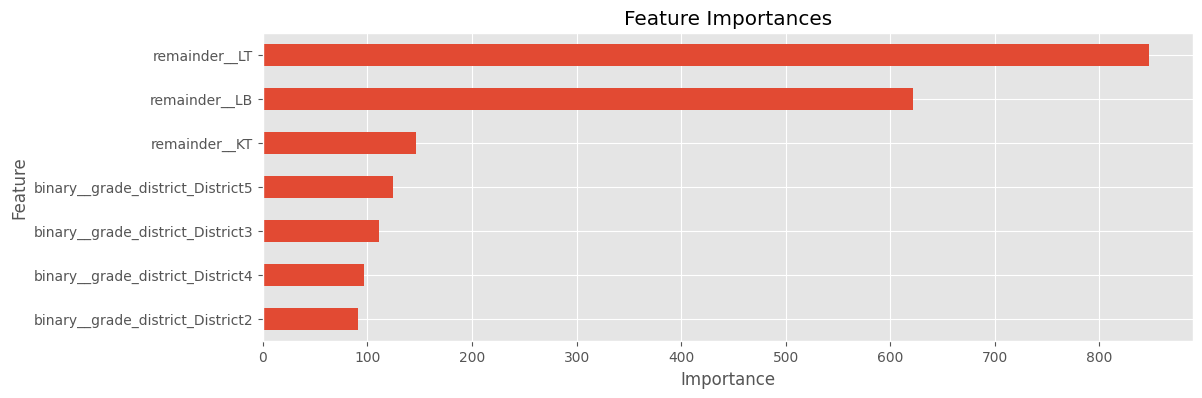

In [42]:
feature_names = ct.get_feature_names_out()

# Mengambil feature importances dari model LGBM dalam pipeline
# Jika `best_model_lgbm_rmse['model']` adalah objek LGBMRegressor dalam pipeline, gunakan:
coef1 = pd.Series(final_model_lgbm.named_steps['model'].feature_importances_, index=feature_names).sort_values(ascending=True)

# Plot feature importances
plt.figure(figsize=(12, 4))
coef1.plot(kind='barh', title='Feature Importances')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

berdasarkan grafik di atas : 


**1. Fitur Dominan**

- Fitur remainder__LT memiliki nilai importance tertinggi, menunjukkan bahwa fitur ini adalah yang paling berpengaruh dalam model.
- remainder__LB juga memiliki nilai importance yang tinggi, sedikit di bawah remainder__LT. Ini menunjukkan bahwa kedua fitur ini bersama-sama memberikan kontribusi yang signifikan dalam mempengaruhi output prediksi.
- remainder__KT adalah fitur penting lainnya, tetapi kontribusinya tidak sebesar dua fitur pertama.

**2. Pengaruh Fitur Kategori Lainnya**

- Fitur kategori binary__grade_district_District5, binary__grade_district_District3, binary__grade_district_District4, dan binary__grade_district_District2 memiliki nilai importance yang lebih kecil dibandingkan fitur-fitur remainder. Meskipun mereka berkontribusi terhadap prediksi model, pengaruh mereka jauh lebih kecil dibandingkan tiga fitur remainder.
- Fitur distrik ini mungkin mencerminkan klasifikasi atau karakteristik kategori tertentu dari data yang membantu model dalam meningkatkan akurasi prediksi, tetapi dampaknya secara keseluruhan relatif lebih kecil.

**3. Distribusi Pentingnya Fitur**

- Terlihat bahwa terdapat perbedaan signifikan dalam nilai importance antara fitur-fitur remainder dan fitur binary__grade_district. Hal ini dapat mengindikasikan bahwa model sangat bergantung pada informasi yang diberikan oleh fitur remainder dalam memprediksi output.
- Fitur dengan importance rendah mungkin tidak terlalu relevan dalam konteks data ini, tetapi dapat menjadi tambahan yang kecil untuk meningkatkan kinerja model. Jika ada keinginan untuk menyederhanakan model, fitur-fitur dengan importance rendah dapat dipertimbangkan untuk dihapus, meskipun mungkin ada risiko penurunan akurasi.

### **RESIDUAL PLOT**

Residual plot adalah grafik yang menunjukan residual(error) / kesalahan prediksi pada sumbu y dan nilai target(House Price) pada sumbu x. dengan menggunakam residual plot kita dapat mengetahui bagaimana performa model dan hasil dari residual pada rentang variabel target (House Price). 

In [43]:
from matplotlib.ticker import FuncFormatter

# Formatter function to display values in millions
def millions(x, pos):
    return f'{x * 1e-9:.0f} M'

# Modified function to plot residuals with axis in millions
def plot_residual(name_y_test, name_y_pred, title):
    residuals = name_y_test - name_y_pred

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Plot residuals
    sns.scatterplot(x=name_y_pred, y=residuals, alpha=0.5, color='#008080', ax=ax[0])
    ax[0].hlines(y=0, xmin=min(name_y_pred), xmax=max(name_y_pred), colors='r', linestyles='dashed')
    ax[0].set_title(f'Residual Plot of {title}')
    ax[0].set_xlabel('Predicted Values')
    ax[0].set_ylabel('Residuals')
    ax[0].xaxis.set_major_formatter(FuncFormatter(millions))
    ax[0].yaxis.set_major_formatter(FuncFormatter(millions))

    # Plot Actual vs Predicted
    sns.scatterplot(x=name_y_test, y=name_y_pred, color='#008080', ax=ax[1], alpha=0.5)
    ax[1].set_title(f'Actual Vs Predict of {title}')
    ax[1].set_xlabel('Predicted Values')
    ax[1].set_ylabel('Actual')
    ax[1].xaxis.set_major_formatter(FuncFormatter(millions))
    ax[1].yaxis.set_major_formatter(FuncFormatter(millions))

    plt.show()

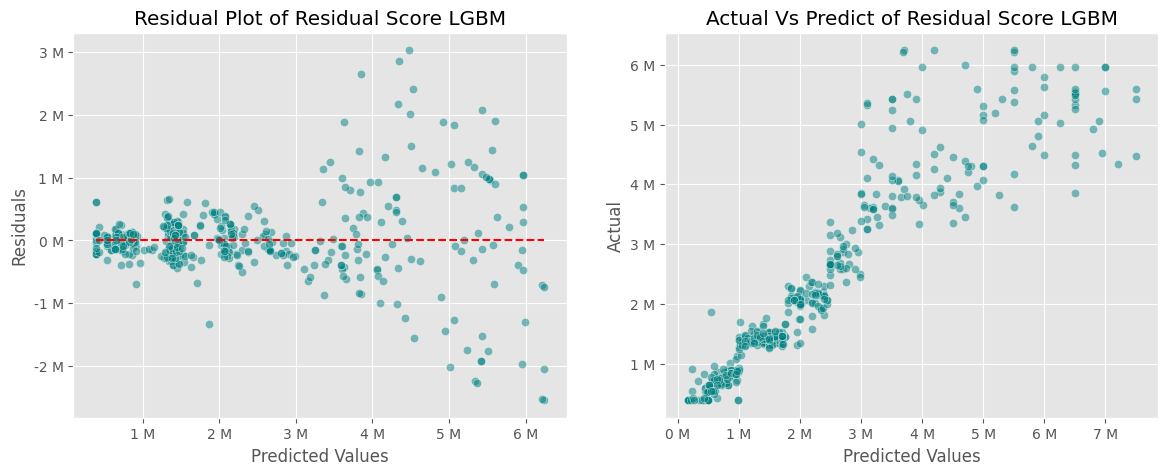

In [44]:
plot_residual(y_test,y_pred_best_lgbm,'Residual Score LGBM')

berdasarkan informasi di atas : 

**1. Residual Plot** 
- Tujuan: Plot residual digunakan untuk mengidentifikasi pola dalam kesalahan prediksi. Pola yang tidak beraturan atau tidak berpola menunjukkan bahwa model tidak memiliki bias tertentu dalam memprediksi nilai.
- Distribusi Residual:
Pada plot ini, residu tersebar di sekitar garis nol merah (garis nol ideal), menunjukkan bahwa kesalahan prediksi rata-rata mendekati nol, yang merupakan tanda yang baik.
Sebagian besar titik berada cukup dekat dengan garis nol, menunjukkan prediksi yang cukup akurat.
- Outliers:
Terdapat beberapa titik outlier di atas dan di bawah garis nol, terutama pada nilai prediksi yang lebih tinggi. Ini menunjukkan bahwa model mungkin mengalami kesulitan untuk memprediksi nilai-nilai yang sangat besar dengan akurasi tinggi.
- Kesimpulan: Distribusi residual menunjukkan bahwa model cukup baik dalam memprediksi data secara keseluruhan, meskipun ada beberapa kesalahan yang lebih besar pada prediksi nilai yang lebih tinggi.

**2. Actual vs Predict Plot** 
- Tujuan: Plot ini menunjukkan hubungan antara nilai aktual dan prediksi, dan membantu kita memahami seberapa dekat prediksi model terhadap nilai sebenarnya.
- Distribusi Titik:
Titik-titik berkelompok di sekitar garis diagonal (garis identitas) yang ideal, menunjukkan bahwa model cukup baik dalam memprediksi nilai yang dekat dengan nilai aktual.
Pada bagian awal hingga sekitar 3 juta, prediksi cukup baik, dengan banyak titik yang berada di dekat garis diagonal.
- Deviansi pada Nilai Tinggi:
Untuk nilai aktual yang lebih tinggi (di atas sekitar 4 juta), terdapat penyebaran titik yang lebih luas, menunjukkan prediksi yang kurang akurat pada nilai-nilai ini.
- Kesimpulan: Model berfungsi dengan baik pada nilai rendah hingga menengah, tetapi mungkin perlu perbaikan dalam memprediksi nilai yang lebih besar untuk mengurangi penyebaran yang signifikan di titik-titik tinggi.

### **Explainable ML Algorithm Usihng SHAP**

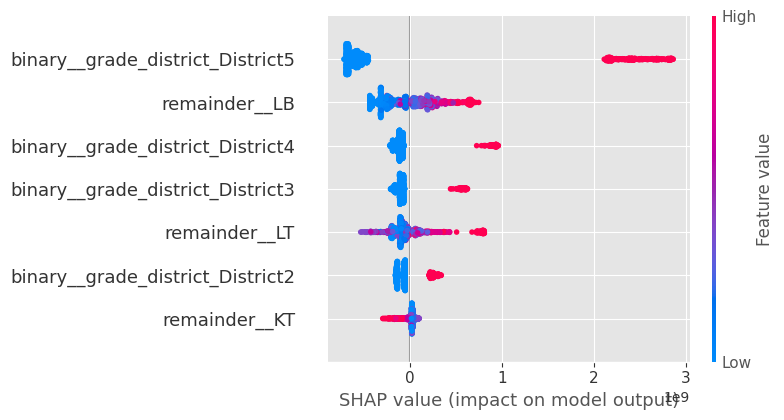

In [45]:
import shap

# Extract fitur yang telah diproses setelah encoding dari pipeline
X_train_encoded = final_model_lgbm.named_steps['prepocessing'].transform(X_train)
column_names = final_model_lgbm.named_steps['prepocessing'].get_feature_names_out()
X_train_df = pd.DataFrame(X_train_encoded, columns=column_names)

# Mengambil model LGBM yang sudah dilatih dari pipeline untuk SHAP
lgbm_model = final_model_lgbm.named_steps['model']

# Menggunakan TreeExplainer untuk SHAP values
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X_train_df)

# Membuat plot summary SHAP
plt.figure(figsize=(26, 14))
shap.summary_plot(shap_values, X_train_df, feature_names=column_names)
plt.show()


**Struktur Plot**

- **Sumbu Y (Fitur)**: Fitur-fitur yang digunakan dalam model. Diurutkan berdasarkan tingkat kontribusi mereka terhadap prediksi. Fitur dengan kontribusi terbesar berada di bagian atas.
- **Sumbu X (SHAP Value)**: Nilai SHAP mengindikasikan besarnya dampak sebuah fitur pada output model. Nilai positif menunjukkan bahwa fitur tersebut meningkatkan prediksi model, sedangkan nilai negatif menurunkan prediksi.
- **Warna (Nilai Fitur)**: Warna menunjukkan nilai fitur, dengan **merah** berarti nilai fitur yang tinggi dan **biru** berarti nilai fitur yang rendah.

**Interpretasi Setiap Fitur**
1. **binary__grade_district_District5**:
   - Fitur ini memiliki kontribusi yang signifikan terhadap prediksi model, terlihat dari distribusi SHAP yang tersebar cukup luas di sisi positif.
   - Warna merah pada nilai SHAP yang tinggi menunjukkan bahwa nilai tinggi dari fitur ini meningkatkan output model secara signifikan.
  
2. **remainder__LB**:
   - Fitur ini juga berpengaruh kuat terhadap prediksi model, dengan nilai SHAP yang tersebar di sekitar nol hingga nilai positif.
   - Nilai tinggi (merah) meningkatkan output model, sedangkan nilai rendah (biru) memiliki pengaruh yang lebih rendah.
  
3. **binary__grade_district_District4** dan **binary__grade_district_District3**:
   - Kedua fitur ini memberikan dampak pada model, meskipun tidak sebesar fitur-fitur sebelumnya.
   - Nilai tinggi dari fitur ini juga cenderung meningkatkan prediksi model.

4. **remainder__LT**:
   - Fitur ini memiliki kontribusi yang sedikit lebih rendah dibandingkan fitur-fitur sebelumnya.
   - Nilai SHAP tersebar di sekitar nol, dengan pengaruh kecil terhadap output.

5. **binary__grade_district_District2** dan **remainder__KT**:
   - Fitur-fitur ini memiliki dampak paling kecil pada output model dibandingkan fitur-fitur lainnya.
   - Sebagian besar SHAP value untuk fitur ini berada di dekat nol, yang menunjukkan bahwa fitur ini memiliki pengaruh yang sangat minimal dalam prediksi model.



### **`Observation House`**

In [46]:
shap.initjs()

In [47]:
def shap_plot(j, model, S):
    explainerModel = shap.TreeExplainer(model)
    shap_value_model = explainerModel.shap_values(S)
    p = shap.force_plot(
        explainerModel.expected_value,
        shap_value_model[j],                # nilai shap pada value index
        S.iloc[[j]])                        # data features pada index ke j
    return p



In [48]:
# Ekstrak langkah `HandlingOutliers` dan `prepocessing` dari pipeline
handling_outliers = final_model_lgbm.named_steps['HandlingOutliers']
preprocessing_ct = final_model_lgbm.named_steps['prepocessing']

# Terapkan transformasi pada X_test secara bertahap
X_test_outliers_handled = handling_outliers.transform(X_test)
X_test_transformed = preprocessing_ct.transform(X_test_outliers_handled)

# Dapatkan nama kolom dari ColumnTransformer
column_names = preprocessing_ct.get_feature_names_out()

# Buat DataFrame dengan kolom yang telah ditransformasikan
X_test_df = pd.DataFrame(X_test_transformed, columns=column_names)

In [49]:
def predict_and_shap_plot(index, model, data):
    # Memprediksi hasil berdasarkan nilai y pada indeks tertentu
    if y_test.iloc[index] <= 1500000000 :
        print(f'House Price Under 1.5 M')
    elif y_test.iloc[index] > 1500000000 and y_test.iloc[index] <= 3000000000:
        print(f'House Price Upper 1.5 M and Under 3 M')
    elif y_test.iloc[index] > 3000000000 :
        print(f'House Price Upper 3 M')

    # Memanggil fungsi shap_plot
    return shap_plot(index, model, data)


**Observation on Index 0**

In [50]:
print(f'nilai aktual : {y_test.iloc[0]}')
predict_and_shap_plot(0, final_model_lgbm['model'], X_test_df) 

nilai aktual : 3050000000.0
House Price Upper 3 M


**Observation On Index 120**

In [51]:
print(f'nilai aktual : {y_test.iloc[120]}')
predict_and_shap_plot(120, final_model_lgbm['model'], X_test_df) 

nilai aktual : 1700000000.0
House Price Upper 1.5 M and Under 3 M


**Observation On Index 50**

In [52]:
print(f'nilai aktual : {y_test.iloc[50]}')
predict_and_shap_plot(50, final_model_lgbm['model'], X_test_df) 

nilai aktual : 1090000000.0
House Price Under 1.5 M


**Observation On Index 27**

In [53]:
print(f'nilai aktual : {y_test.iloc[27]}')
predict_and_shap_plot(27, final_model_lgbm['model'], X_test_df) 

nilai aktual : 2000000000.0
House Price Upper 1.5 M and Under 3 M


### **Model Performance on House Price Prediction**

In [54]:
df_versus = pd.DataFrame({
    'Aktual House Price' :y_test.values,
    'Predicted House Price' : y_pred_best_lgbm.tolist()
})

df_versus['Price Category'] = pd.qcut(df_versus['Predicted House Price'], q=3, labels=["low", "medium", "high"])

df_low_price = df_versus[df_versus['Price Category'] == 'low'].reset_index(drop=True)
df_medium_price = df_versus[df_versus['Price Category'] == 'medium'].reset_index(drop=True)
df_high_price = df_versus[df_versus['Price Category'] == 'high'].reset_index(drop=True)



df_low_price['abs error'] = np.abs(df_low_price['Aktual House Price'] - df_low_price['Predicted House Price'])
df_low_price['abs persen error'] = (df_low_price['abs error'] / df_low_price['Aktual House Price'] * 100)

df_medium_price['abs error'] = np.abs(df_medium_price['Aktual House Price'] - df_medium_price['Predicted House Price'])
df_medium_price['abs persen error'] = (df_medium_price['abs error'] / df_medium_price['Aktual House Price'] * 100)

df_high_price['abs error'] = np.abs(df_high_price['Aktual House Price'] - df_high_price['Predicted House Price'])
df_high_price['abs persen error'] = (df_high_price['abs error'] / df_high_price['Aktual House Price'] * 100)


mape_low_price = df_low_price["abs persen error"].mean()
mape_medium_price = df_medium_price["abs persen error"].mean()
mape_high_price = df_high_price["abs persen error"].mean()

# Membuat DataFrame dari hasil perhitungan MAPE
data = {
    "Segmen price": ["Low price", "Medium price", "High price"],
    "MAPE": [mape_low_price, mape_medium_price, mape_high_price]
}

df_mape = pd.DataFrame(data)

df_mape

,Segmen price,MAPE
0,Low price,22.93
1,Medium price,13.36
2,High price,17.83


In [55]:
def horizontal_barplot_with_annotations(df, x_col, y_col, hue_col=None, palette='viridis', title='Model Performance', xlabel='MAPE', ylabel='Segmentation'):

    # Membuat horizontal barplot
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.barplot(data=df, y=y_col, x=x_col, hue=hue_col, palette=palette, ax=ax)
    
    # Menambahkan anotasi pada setiap bar
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width():.2f} %',
            va='center', ha='right', color='white'
        )

    # Menambahkan judul dan label sumbu
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Menampilkan plot
    plt.show()

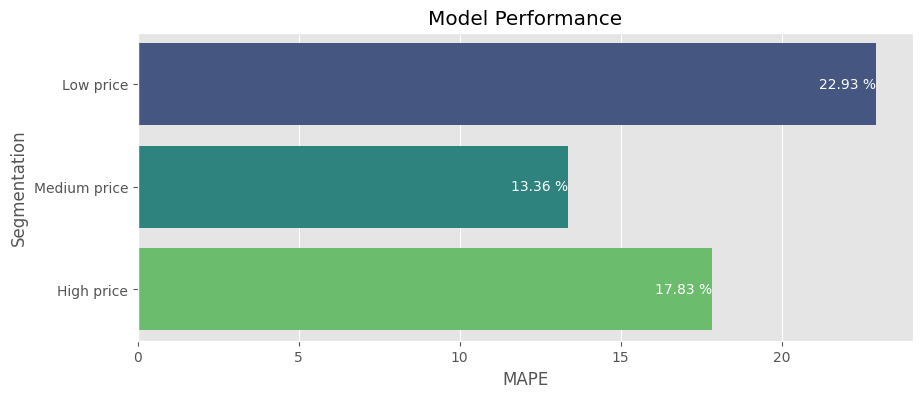

In [56]:
horizontal_barplot_with_annotations(df_mape, 'MAPE','Segmen price')   


berdasarkan informasi di atas : 


1. **Segmen Low Price**:
   - Model memiliki **MAPE sebesar 22.93%** pada segmen ini.
   - MAPE yang relatif tinggi menunjukkan bahwa model memiliki tingkat kesalahan prediksi yang lebih besar untuk segmen harga rendah dibandingkan segmen lainnya.
   - Hal ini bisa terjadi karena karakteristik data pada segmen harga rendah yang mungkin lebih bervariasi atau sulit diprediksi oleh model.

2. **Segmen Medium Price**:
   - Model mencapai performa terbaik pada segmen ini dengan **MAPE sebesar 13.36%**.
   - Nilai MAPE yang rendah menunjukkan bahwa model mampu memprediksi dengan akurasi yang lebih baik pada segmen harga menengah.
   - Kemungkinan besar, data pada segmen ini lebih konsisten atau memiliki pola yang dapat dipelajari dengan baik oleh model.

3. **Segmen High Price**:
   - Model memiliki **MAPE sebesar 17.83%** pada segmen harga tinggi, lebih rendah daripada harga rendah namun lebih tinggi daripada harga menengah.
   - Ini menunjukkan bahwa model memiliki performa yang cukup baik dalam memprediksi segmen harga tinggi, meskipun ada ruang untuk peningkatan.

**Kesimpulan**

- **Segmentasi Harga Menengah** memberikan kinerja terbaik untuk model, dengan MAPE yang paling rendah, menunjukkan bahwa model dapat memprediksi nilai pada segmen ini dengan lebih akurat.
- **Segmentasi Harga Rendah** memiliki MAPE yang paling tinggi, menunjukkan kesulitan model dalam memprediksi nilai di segmen ini, kemungkinan disebabkan oleh variasi yang lebih besar atau pola yang kurang jelas pada data harga rendah.
- Secara keseluruhan, hasil ini menunjukkan bahwa model bekerja lebih baik pada segmen harga menengah dan tinggi dibandingkan pada harga rendah.



In [57]:
# save model using pickle 
# import pickle 

# lightgbm_model = Pipeline([
#     ('HandlingOutliers',HandlingOutliers()),
#     ('prepocessing',ct),
#     ('model', LGBMRegressor(
#     num_leaves=100,
#     n_estimators=300,
#     min_data_in_leaf=50,
#     max_depth=5,
#     learning_rate=0.05,
#     lambda_l2=0.1,
#     lambda_l1=1,
#     feature_fraction=1.0,
#     bagging_freq=5,
#     bagging_fraction=0.8,verbose=-1,random_state=0))
# ])

# lightgbm_model.fit(X,y)

# pickle.dump(lightgbm_model, open('best_model_lgbm.sav', 'wb'))

### **Conclussion**

- Metrik Utama yang di gunakan adalah RMSE dan MAPE.
    - RMSE di gunakan untuk menilai performa model agar mendapatkan model terbaik. karena cara kerja RMSE yang memberikan penalti besar terhadap residual(error) dalam prediksi sehingga kita bisa mendapatkan performa model secara maksimal. 
    - MAPE di gunakan untuk menginterpretasikan perfroma model, karena bentuk MAPE dalam persentasi maka akan lebih mudah menjelaskan performa model kepada orang non teknis. 

- Berdasarkan Hyperparameter Tuning model terbaik adalah : 
    - Light Gradient Boosting Machine Regressor
    - Nilai RMSE pada data test : 640,545,737
    - Nilai MAPE pada secara kesulurhan data test : 17% 
    - Nilai MAPE per segmentasi :
        - LOW Price : 22.9 %
        - MEDIUM Price : 13.3 %
        - HIGH Price : 17.8 % 
        - model cukup baik dan stabil dalam memprediksi *House Price* untuk segmentasi Medium Price dan High Price. dan performanya berkurang saat memprediksi segmentasi Low Price. 

- Limitasi Model : 

    Model ini hanya valid untuk memprediksi target : 
    - **House Price kota Bandung** : 135 jt - 7.5 M
    
    dan model ini valid di gunakan jika menggunakan feature : 
    - **Luas Tanah** : 556 m (max)
    - **Luas Bangunan** : 507 m (max)
    - **Jumlah Kamar** : 1 - 8
    - **Kecamatan** : 'antapani', 'sukasari', 'cibeunying kidul', 'buahbatu', 'coblong','mandalajati', 'arcamanik', 'bojongloa kaler', 'rancasari','gedebage', 'cibeunying kaler', 'bandung kidul', 'kiaracondong','ujungberung', 'sukajadi', 'regol', 'cidadap', 'lengkong','cibiru', 'batununggal', 'cicendo', 'bandung kulon', 'andir','panyileukan', 'astana anyar', 'bojongloa kidul', 'bandung wetan','babakan ciparay', 'cinambo'
    
    Berdasarkan informasi di atas dapat disimpulkan bahwa model tidak akan valid di gunakan jika terdapat nilai atau kategori yang tidak sesuai. 